<a href="https://colab.research.google.com/github/zpetey28/IS4487_ZackPeterson/blob/main/Copy_of_lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [7]:
import pandas as pd
import re
from html import unescape

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [19]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Data_Analytics/Lab 4/x_superbowl.csv'


df = pd.read_csv(file_path)


df.head()

,Unnamed: 0,_id,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,...,matching_rules,retweeted_status,extended_tweet,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,scopes
0,0,6020fc7e9e1aa8e3e7ad0832,Mon Feb 08 04:29:58 +0000 2021,1.358630e+18,1358634152719839233,@Rebe_Charizard ?????????????????????m(*_ _)m,"[16, 45]","<a href=""http://twitter.com/download/iphone"" r...",False,1.358630e+18,...,[{'tag': None}],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6020fc7e9e1aa8e3e7ad0833,Mon Feb 08 04:29:55 +0000 2021,1.358630e+18,1358634138639605762,"RT @iiiRatcha: ????????????????????""??????????...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,...,[{'tag': None}],{'created_at': 'Sun Feb 07 15:23:25 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6020fc7e9e1aa8e3e7ad0834,Mon Feb 08 04:29:48 +0000 2021,1.358630e+18,1358634110600826880,@kashDAI not you listening to cfm and m&amp;m ...,"[9, 140]","<a href=""http://twitter.com/download/iphone"" r...",True,1.358630e+18,...,[{'tag': None}],NaN,{'full_text': '@kashDAI not you listening to c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6020fc7e9e1aa8e3e7ad0835,Mon Feb 08 04:29:43 +0000 2021,1.358630e+18,1358634090350583809,RT @_soniashenoy: M&amp;M says \nSsangyong dea...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,...,[{'tag': None}],{'created_at': 'Fri Feb 05 08:32:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6020fc7e9e1aa8e3e7ad0836,Mon Feb 08 04:29:42 +0000 2021,1.358630e+18,1358634084537352192,RT @mmschocolate: This year?s #SuperBowlLV com...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,...,[{'tag': None}],{'created_at': 'Wed Feb 03 15:06:02 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as user_mentioned, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [20]:

# Step 0: Define columns for string to numeric conversion
str_numeric_columns = ['in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str']

# Step 1: Remove unnamed columns
unnamed_columns = [col for col in df.columns if 'Unnamed' in col]
df_cleaned = df.drop(columns=unnamed_columns)

# Step 2: Convert datetime columns
df_cleaned['created_at'] = pd.to_datetime(df_cleaned['created_at'], errors='coerce')

# Step 3: Ensure numeric columns are treated as numeric
numeric_columns = ['quote_count', 'reply_count', 'retweet_count', 'favorite_count']
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Step 4: Drop complex data columns if they are not needed for analysis
complex_data_columns = ['user', 'entities', 'retweeted_status', 'extended_tweet',
                        'extended_entities', 'quoted_status', 'quoted_status_permalink', 'scopes']
df_cleaned = df_cleaned.drop(columns=complex_data_columns, errors='ignore')

# Step 5: Handle NULL values in a more nuanced way
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(0)

# Step 6: Convert string columns to numeric
df_cleaned[str_numeric_columns] = df_cleaned[str_numeric_columns].apply(pd.to_numeric, errors='coerce')

# Step 7: Remove duplicate rows based on the 'id_str' column
df_no_duplicates = df_cleaned.drop_duplicates(subset='id_str')

# Display the number of rows after removing duplicates
print(f"The total amount of tweets is {df_no_duplicates.shape[0]}")

# Optional: Display the first few rows of the cleaned DataFrame
df_no_duplicates.head()


The total amount of tweets is 9748


,_id,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,filter_level,lang,matching_rules,possibly_sensitive,quoted_status_id,quoted_status_id_str
0,6020fc7e9e1aa8e3e7ad0832,2021-02-08 04:29:58+00:00,1.358630e+18,1358634152719839233,@Rebe_Charizard ?????????????????????m(*_ _)m,"[16, 45]","<a href=""http://twitter.com/download/iphone"" r...",False,1.358630e+18,1.358634e+18,...,0,1,False,False,low,ja,[{'tag': None}],NaN,NaN,NaN
1,6020fc7e9e1aa8e3e7ad0833,2021-02-08 04:29:55+00:00,1.358630e+18,1358634138639605762,"RT @iiiRatcha: ????????????????????""??????????...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,...,0,0,False,False,low,th,[{'tag': None}],NaN,NaN,NaN
2,6020fc7e9e1aa8e3e7ad0834,2021-02-08 04:29:48+00:00,1.358630e+18,1358634110600826880,@kashDAI not you listening to cfm and m&amp;m ...,"[9, 140]","<a href=""http://twitter.com/download/iphone"" r...",True,1.358630e+18,1.358633e+18,...,0,0,False,False,low,en,[{'tag': None}],NaN,NaN,NaN
3,6020fc7e9e1aa8e3e7ad0835,2021-02-08 04:29:43+00:00,1.358630e+18,1358634090350583809,RT @_soniashenoy: M&amp;M says \nSsangyong dea...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,...,0,0,False,False,low,en,[{'tag': None}],NaN,NaN,NaN
4,6020fc7e9e1aa8e3e7ad0836,2021-02-08 04:29:42+00:00,1.358630e+18,1358634084537352192,RT @mmschocolate: This year?s #SuperBowlLV com...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,...,0,0,False,False,low,en,[{'tag': None}],NaN,NaN,NaN


## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 posts with highest engagement

<ipython-input-23-2ab1090fabe7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['device'] = df_no_duplicates['source'].str.extract('>(.*?)<')
<ipython-input-23-2ab1090fabe7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_counts.values, y=device_counts.index, palette='viridis')


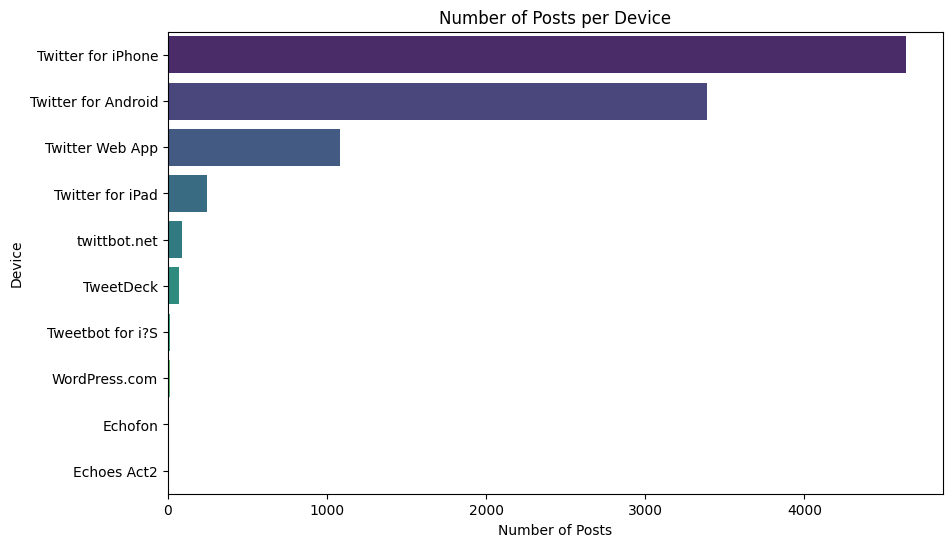

In [23]:
#chart 1

import matplotlib.pyplot as plt
import seaborn as sns

# Extracting device information from the 'source' column
# The device information is between ">" and "<" in the 'source' string
df_no_duplicates['device'] = df_no_duplicates['source'].str.extract('>(.*?)<')

# Count the number of posts per device
device_counts = df_no_duplicates['device'].value_counts().head(10)  # Limit to top 10 for readability

# Plotting Number of Posts per Device
plt.figure(figsize=(10, 6))
sns.barplot(x=device_counts.values, y=device_counts.index, palette='viridis')
plt.title('Number of Posts per Device')
plt.xlabel('Number of Posts')
plt.ylabel('Device')
plt.show()




<ipython-input-22-8305eda715f5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='engagement', y=top_engagement['text'].apply(lambda x: x[:50] + '...'), data=top_engagement, palette='coolwarm')


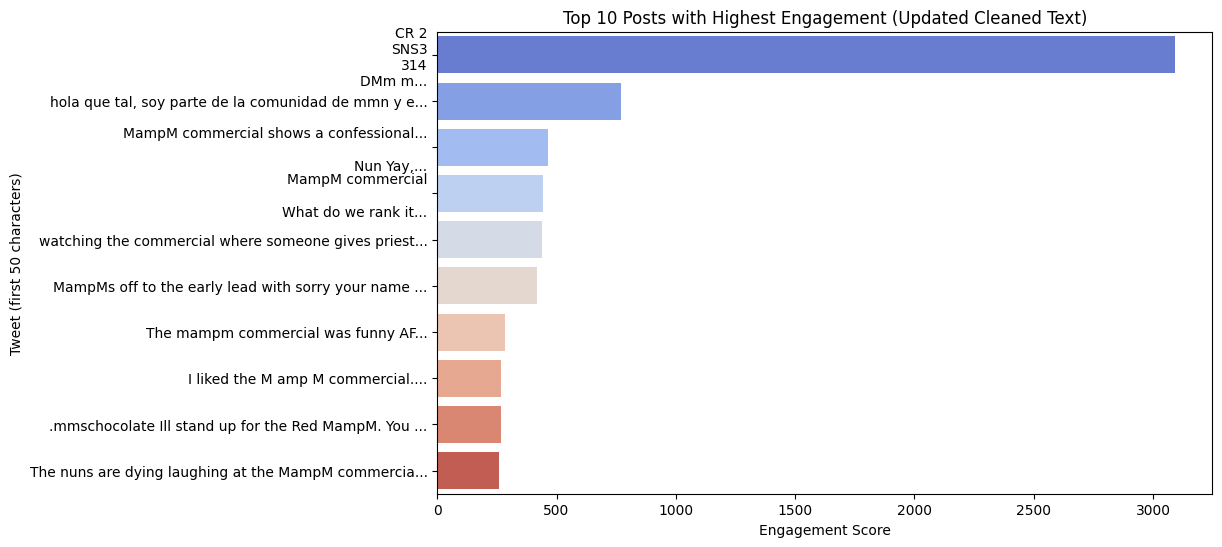

In [22]:
#chart 2
# Redefining the clean_tweet_text function to explicitly remove question marks, @ symbols, and other special characters
def clean_tweet_text_v2(text):
    # This pattern aims to remove question marks, @ symbols, and other non-alphanumeric characters except for some punctuation
    pattern = r'[@?]|[^a-zA-Z0-9\s,.\'!-]'
    # Replace special characters with an empty string
    text_cleaned = re.sub(pattern, '', text)
    return text_cleaned

# Apply the updated cleaning function to the 'text' column of 'top_engagement'
top_engagement['text'] = top_engagement['text'].apply(clean_tweet_text_v2)

# Plotting Top 10 Posts with Highest Engagement again with updated cleaned text
plt.figure(figsize=(10, 6))
sns.barplot(x='engagement', y=top_engagement['text'].apply(lambda x: x[:50] + '...'), data=top_engagement, palette='coolwarm')
plt.title('Top 10 Posts with Highest Engagement (Updated Cleaned Text)')
plt.xlabel('Engagement Score')
plt.ylabel('Tweet (first 50 characters)')
plt.show()